Simulation with inner regions:

<IPython.core.display.Javascript object>


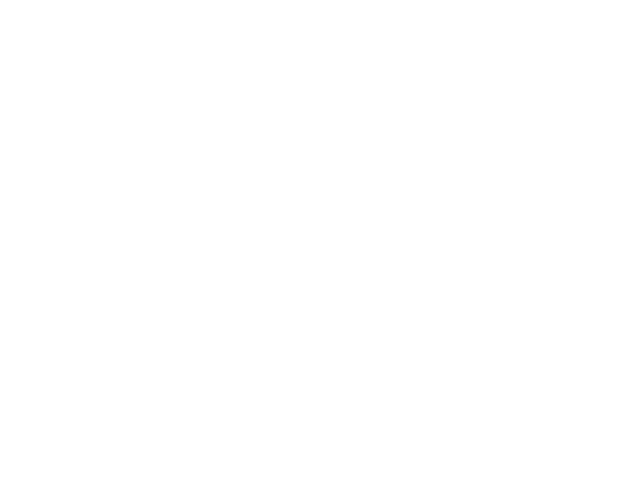

In [1]:
%matplotlib notebook  

from ef_jupyter_visualize import *

efconf = EfConf()

time_grid = TimeGrid(
    total_time = 5.0e-10,
    time_save_step = 5.0e-11,
    time_step_size = 1.0e-11,
)

spat_mesh = SpatialMesh(
    grid_x_size = 1.0,
    grid_x_step = 0.05,
    grid_y_size = 1.0,
    grid_y_step = 0.05,
    grid_z_size = 1.0,
    grid_z_step = 0.05
)

efconf.time_grid = time_grid
efconf.spatial_mesh = spat_mesh
efconf.visualize()

<IPython.core.display.Javascript object>


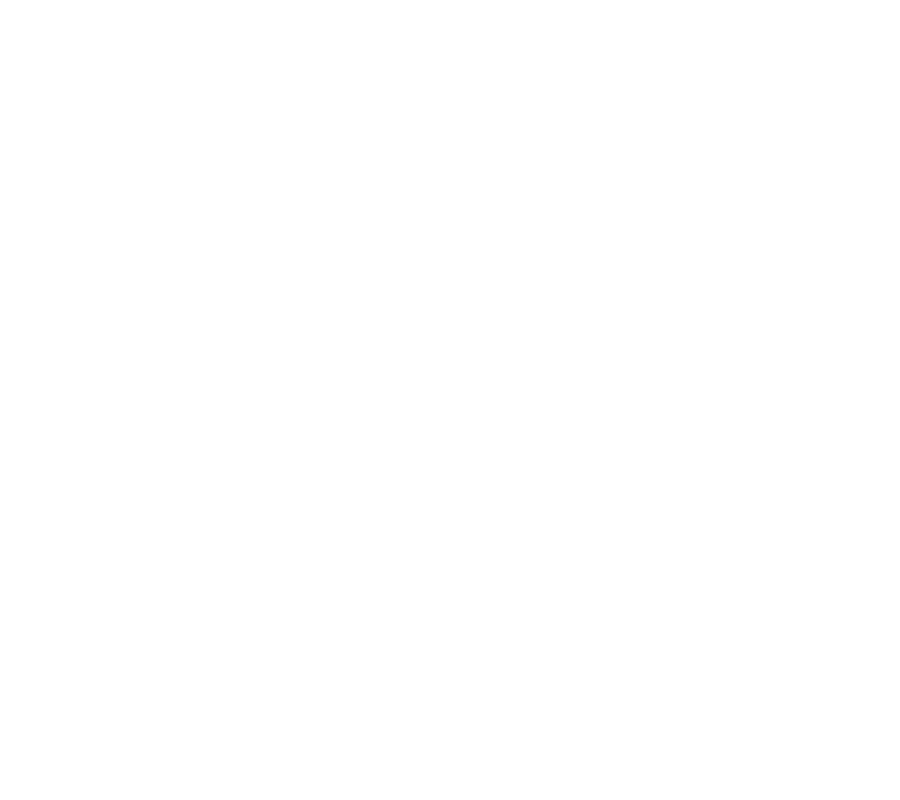

In [2]:
box_src = ParticleSourceBox( 
    name = 'cathode_emitter',
    initial_number_of_particles = 300,
    particles_to_generate_each_step = 300,
    box_x_left = 0.475,
    box_x_right = 0.525,
    box_y_bottom = 0.475,
    box_y_top = 0.525,
    box_z_near = 0.18,
    box_z_far = 0.19,
    mean_momentum_x = 0,
    mean_momentum_y = 0,
    mean_momentum_z = 9.5e-17,
    temperature = 0.0,
    charge = -1.5e-07,
    mass = 2.8e-25 )
efconf.add_source( box_src )
efconf.visualize()

<IPython.core.display.Javascript object>


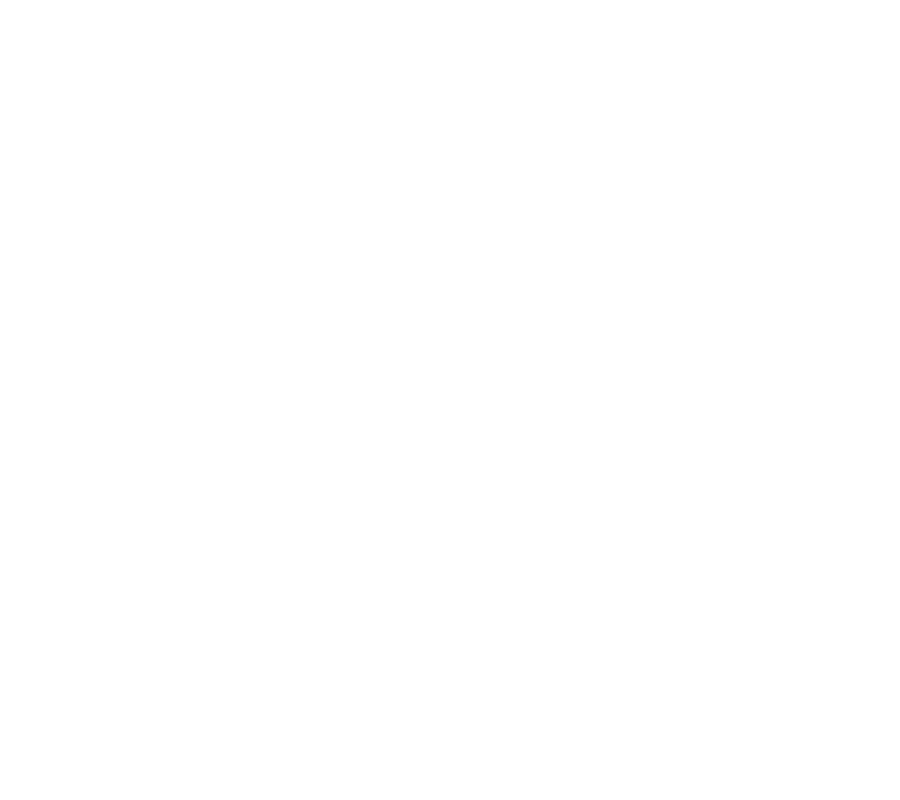

In [3]:
cathode = InnerRegionTubeAlongZSegment( 
    name = 'cathode',
    potential = 0.0,
    tube_segment_axis_x = 0.5, 
    tube_segment_axis_y = 0.5,
    tube_segment_axis_start_z = 0.1, 
    tube_segment_axis_end_z = 0.15,
    tube_segment_inner_radius = 0.03, 
    tube_segment_outer_radius = 0.1,
    tube_segment_start_angle_deg = 0, 
    tube_segment_end_angle_deg = 350 )
efconf.add_source( cathode )


# anode = InnerRegionTubeAlongZSegment( 
#     name = 'anode',
#     potential = 3.36,
#     tube_segment_axis_x = 0.5, 
#     tube_segment_axis_y = 0.5,
#     tube_segment_axis_start_z = 0.3, 
#     tube_segment_axis_end_z = 0.35,
#     tube_segment_inner_radius = 0.03, 
#     tube_segment_outer_radius = 0.1,
#     tube_segment_start_angle_deg = 0, 
#     tube_segment_end_angle_deg = 350
# )
# efconf.add_source( anode )


n_of_segments = 6
segment_arc = 50
segment_space = 10
for i in range( n_of_segments ):
    anode = InnerRegionTubeAlongZSegment( 
        name = 'anode' + str(i),
        potential = 3.36,
        tube_segment_axis_x = 0.5, 
        tube_segment_axis_y = 0.5,
        tube_segment_axis_start_z = 0.3, 
        tube_segment_axis_end_z = 0.35,
        tube_segment_inner_radius = 0.01, 
        tube_segment_outer_radius = 0.1,
        tube_segment_start_angle_deg = i * (segment_arc + segment_space), 
        tube_segment_end_angle_deg = i * (segment_arc + segment_space) + segment_arc )
    efconf.add_source( anode )


# cathode = InnerRegionTubeAlongAxis( 
#     name = 'cathode',
#     potential = 0.0,
#     axis = 'z',
#     tube_axis_start_x = 0.5, 
#     tube_axis_start_y = 0.5,
#     tube_axis_start_z = 0.1, 
#     tube_length = 0.05,
#     tube_inner_radius = 0.03, 
#     tube_outer_radius = 0.1 )
# efconf.add_source( cathode )

# anode = InnerRegionTubeAlongAxis( 
#     name = 'anode',
#     potential = 3.36,
#     axis = 'z',
#     tube_axis_start_x = 0.5, 
#     tube_axis_start_y = 0.5,
#     tube_axis_start_z = 0.4, 
#     tube_length = 0.05,
#     tube_inner_radius = 0.01, 
#     tube_outer_radius = 0.1 )
# efconf.add_source( anode )

# efconf.output_file = OutputFile( 
#     output_filename_prefix = 'out_tube_',
#     output_filename_suffix = '.h5'
# )


# cathode = InnerRegionCylinderAlongAxis( 
#     name = 'cathode',
#     potential = 0.0,
#     axis = 'z',
#     cylinder_axis_start_x = 0.25, 
#     cylinder_axis_start_y = 0.25,
#     cylinder_axis_start_z = 0.05, 
#     cylinder_length = 0.05,
#     cylinder_radius = 0.1 )
# efconf.add_source( cathode )

# anode = InnerRegionCylinderAlongAxis( 
#     name = 'anode',
#     potential = 3.36,
#     cylinder_axis_start_x = 0.25, 
#     cylinder_axis_start_y = 0.25,
#     cylinder_axis_start_z = 0.3, 
#     cylinder_length = 0.05,
#     cylinder_radius = 0.1 )
# efconf.add_source( anode )

# efconf.output_file = OutputFile( 
#     output_filename_prefix = 'out_cyl_',
#     output_filename_suffix = '.h5'
# )


efconf.visualize()

In [4]:
efconf.print_config()

[Particle_source_box.cathode_emitter]
box_x_left  =  0.475
box_z_far  =  0.19
box_y_top  =  0.525
box_z_near  =  0.18
mean_momentum_z  =  9.5e-17
particles_to_generate_each_step  =  300
box_y_bottom  =  0.475
temperature  =  0.0
mean_momentum_x  =  0
initial_number_of_particles  =  300
mass  =  2.8e-25
mean_momentum_y  =  0
charge  =  -1.5e-07
box_x_right  =  0.525

[Inner_region_tube_along_z_segment.cathode]
potential  =  0.0
tube_segment_axis_start_z  =  0.1
tube_segment_axis_y  =  0.5
tube_segment_inner_radius  =  0.03
tube_segment_axis_end_z  =  0.15
tube_segment_axis_x  =  0.5
tube_segment_end_angle_deg  =  350
tube_segment_outer_radius  =  0.1
tube_segment_start_angle_deg  =  0

[Inner_region_tube_along_z_segment.anode3]
potential  =  3.36
tube_segment_axis_start_z  =  0.3
tube_segment_axis_y  =  0.5
tube_segment_inner_radius  =  0.01
tube_segment_axis_end_z  =  0.35
tube_segment_axis_x  =  0.5
tube_segment_end_angle_deg  =  230
tube_segment_outer_radius  =  0.1
tube_segment_star

In [5]:
efconf.run()

command: python3 ../../main.py /tmp/tmp2jdb09ms.ini
Time step was shrinked to 9.804E-12 from 1.000E-11  to fit round number of cells.
Time save step was shrinked to 4.902E-11 from 5.000E-11 to be a multiple of time step.
field-solver: inner regions support is experimental
keep eye on cathode
keep eye on anode3
keep eye on anode4
keep eye on anode2
keep eye on anode0
keep eye on anode1
keep eye on anode5
9261 9261
Writing step 0 to file out_0000000.h5
9261 9261
Source name = cathode_emitter, number of particles = 300
Time step from 0 to 1 of 51
Time step from 1 to 2 of 51
Time step from 2 to 3 of 51
Time step from 3 to 4 of 51
Time step from 4 to 5 of 51
Writing step 5 to file out_0000005.h5
9261 9261
Source name = cathode_emitter, number of particles = 1800
Time step from 5 to 6 of 51
Time step from 6 to 7 of 51
Time step from 7 to 8 of 51
Time step from 8 to 9 of 51
Time step from 9 to 10 of 51
Writing step 10 to file out_0000010.h5
9261 9261
Source name = cathode_emitter, number of p

<IPython.core.display.Javascript object>


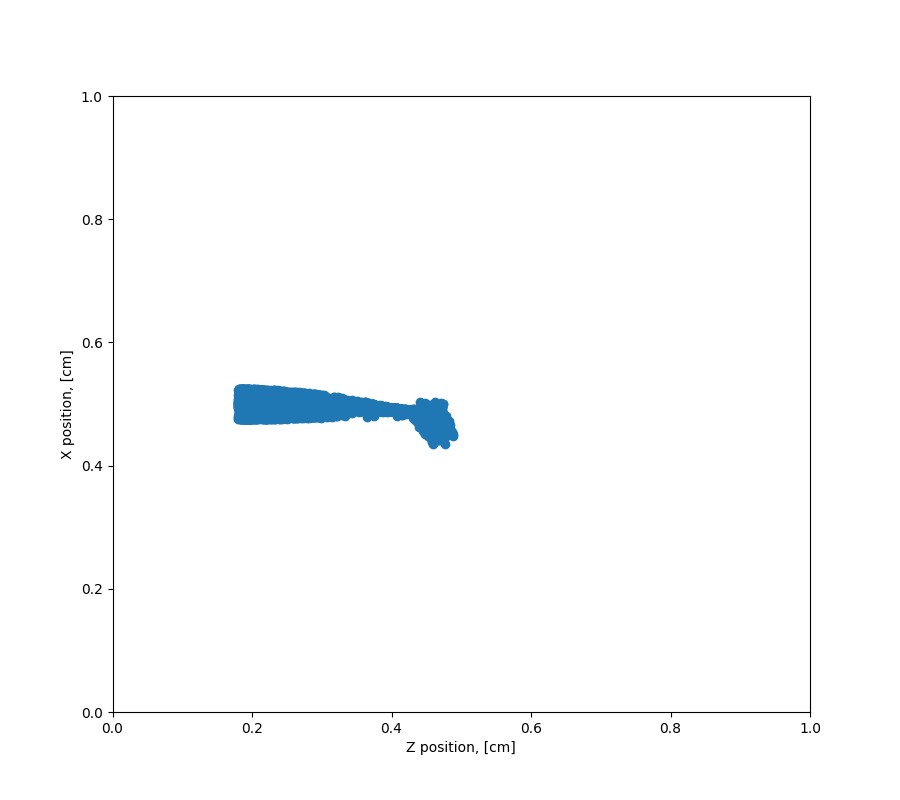

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

plt.close()
plt.close()
plt.close()

filename = 'out_0000050.h5'
#filename = 'out_tube_0000050.h5'
#filename = 'out_cyl_0000050.h5'

h5 = h5py.File( filename , mode="r") # read h5 file
plt.xlabel("Z position, [cm]")
plt.xlim([0, h5["/Spatial_mesh"].attrs["z_volume_size"]]) # 
plt.ylabel("X position, [cm]")
plt.ylim([0, h5["/Spatial_mesh"].attrs["x_volume_size"]])
plt.plot(h5["/Particle_sources/cathode_emitter/position_z"][:],
         h5["/Particle_sources/cathode_emitter/position_x"][:],'o')
plt.savefig('plot.png')
plt.show()

<IPython.core.display.Javascript object>


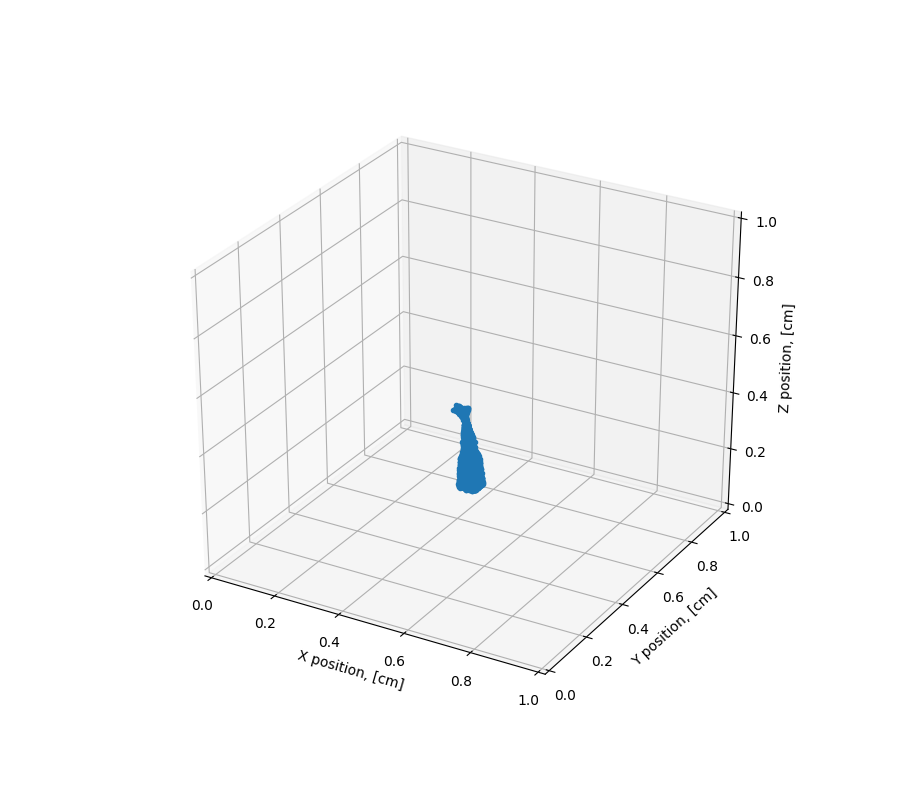

In [8]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

filename = 'out_0000035.h5'
#filename = 'out_tube_0000050.h5'
#filename = 'out_cyl_0000050.h5'


h5 = h5py.File( filename , mode="r") # read h5 file
ax.set_xlabel("X position, [cm]")
ax.set_xlim([0, h5["/Spatial_mesh"].attrs["x_volume_size"]]) # 
ax.set_ylabel("Y position, [cm]")
ax.set_ylim([0, h5["/Spatial_mesh"].attrs["y_volume_size"]])
ax.set_zlabel("Z position, [cm]")
ax.set_zlim([0, h5["/Spatial_mesh"].attrs["z_volume_size"]])
ax.plot(h5["/Particle_sources/cathode_emitter/position_x"][:],
        h5["/Particle_sources/cathode_emitter/position_y"][:],
        h5["/Particle_sources/cathode_emitter/position_z"][:], '.')

Simulation without inner region, but with external field

In [16]:
%matplotlib notebook  

from ef_jupyter_visualize import *

efconf2 = EfConf()

time_grid = TimeGrid(
    total_time = 5.0e-10,
    time_save_step = 5.0e-11,
    time_step_size = 5.0e-11,
)

spat_mesh = SpatialMesh(
    grid_x_size = 0.5,
    grid_x_step = 0.05,
    grid_y_size = 0.5,
    grid_y_step = 0.05,
    grid_z_size = 0.45,
    grid_z_step = 0.05
)

ex_field = ExternalFieldElectricOnRegularGridFromH5File(name = 'elec_file', 
                                                        filename='out_0000000.h5')
#efconf2.output_filename_prefix = 'out_file_'
out_file = OutputFile( output_filename_prefix = "out_file_", output_filename_suffix = ".h5")
efconf2.output_file = out_file
efconf2.time_grid = time_grid
efconf2.spatial_mesh = spat_mesh
efconf2.add_ex_field( ex_field )
#efconf2.visualize()

In [17]:
box_src = ParticleSourceBox( 
    name = 'cathode_emitter',
    initial_number_of_particles = 300,
    particles_to_generate_each_step = 300,
    box_x_left = 0.225,
    box_x_right = 0.275,
    box_y_bottom = 0.225,
    box_y_top = 0.275,
    box_z_near = 0.11,
    box_z_far = 0.12,
    mean_momentum_x = 0,
    mean_momentum_y = 0,
    mean_momentum_z = 9.5e-17,
    temperature = 0.0,
    charge = -1.5e-07,
    mass = 2.8e-25 )
efconf2.add_source( box_src )
#efconf2.visualize()

In [18]:
efconf2.print_config()

[Particle_source_box.cathode_emitter]
temperature  =  0.0
mean_momentum_x  =  0
box_y_bottom  =  0.225
box_x_left  =  0.225
box_y_top  =  0.275
box_z_far  =  0.12
charge  =  -1.5e-07
mean_momentum_y  =  0
box_x_right  =  0.275
mean_momentum_z  =  9.5e-17
particles_to_generate_each_step  =  300
initial_number_of_particles  =  300
box_z_near  =  0.11
mass  =  2.8e-25

[Boundary conditions]
boundary_phi_near  =  0
boundary_phi_left  =  0
boundary_phi_far  =  0
boundary_phi_right  =  0
boundary_phi_top  =  0
boundary_phi_bottom  =  0

[Time grid]
time_save_step  =  5e-11
time_step_size  =  5e-11
total_time  =  5e-10

[ExternalFieldElectricOnRegularGridFromH5File.elec_file]
filename  =  out_0000000.h5

[Particle interaction model]
particle_interaction_model  =  PIC

[Spatial mesh]
grid_z_step  =  0.05
grid_x_size  =  0.5
grid_x_step  =  0.05
grid_y_step  =  0.05
grid_y_size  =  0.5
grid_z_size  =  0.45

[Output filename]
output_filename_suffix  =  .h5
output_filename_prefix  =  out_file_



In [19]:
efconf2.run()

command: python3 ../../main.py /tmp/tmpyti6an0p.ini
b'1210 1210'
b'Writing step 0 to file out_file_0000000.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 300'
b'Time step from 0 to 1 of 10'
b'Writing step 1 to file out_file_0000001.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 600'
b'Time step from 1 to 2 of 10'
b'Writing step 2 to file out_file_0000002.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 900'
b'Time step from 2 to 3 of 10'
b'Writing step 3 to file out_file_0000003.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 1200'
b'Time step from 3 to 4 of 10'
b'Writing step 4 to file out_file_0000004.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 1500'
b'Time step from 4 to 5 of 10'
b'Writing step 5 to file out_file_0000005.h5'
b'1210 1210'
b'Source name = cathode_emitter, number of particles = 1800'
b'Time step from 5 to 6 of 10'
b'Writing step 6 to file out_fil

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


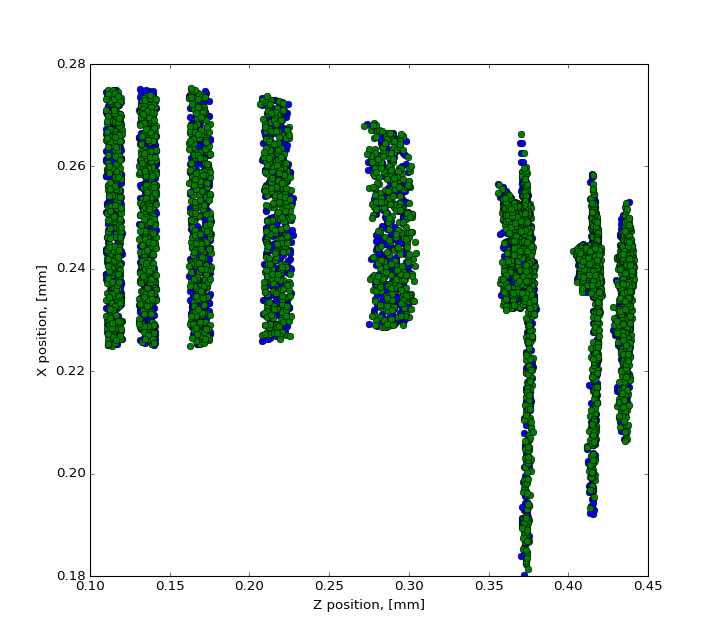

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

plt.close()
filename = 'out_0000010.h5'
h5 = h5py.File( filename , mode="r") # read h5 file
plt.xlabel("Z position, [mm]")
plt.ylabel("X position, [mm]")
filename = 'out_file_0000010.h5'
h5_file = h5py.File( filename , mode="r") # read h5 file
plt.plot(h5["/Particle_sources/cathode_emitter/position_z"][:],
         h5["/Particle_sources/cathode_emitter/position_x"][:],
         'o',
         h5_file["/Particle_sources/cathode_emitter/position_z"][:],
         h5_file["/Particle_sources/cathode_emitter/position_x"][:],
             'o') #plot particles
plt.savefig('plot.png')

<IPython.core.display.Javascript object>


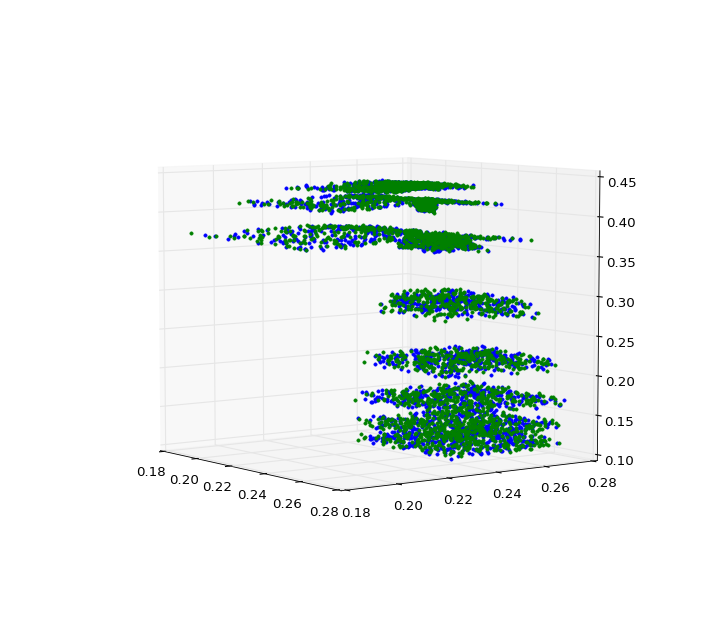

In [23]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

filename = 'out_0000010.h5'
h5 = h5py.File( filename , mode="r") # read h5 file
filename = 'out_file_0000010.h5'
h5_file = h5py.File( filename , mode="r") # read h5 file

ax.plot(h5["/Particle_sources/cathode_emitter/position_x"][:],
         h5["/Particle_sources/cathode_emitter/position_y"][:],
h5["/Particle_sources/cathode_emitter/position_z"][:],'.')
ax.plot(h5_file["/Particle_sources/cathode_emitter/position_x"][:],
         h5_file["/Particle_sources/cathode_emitter/position_y"][:],
h5_file["/Particle_sources/cathode_emitter/position_z"][:],'.')

#plt.show()